In [1]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# fastAI
from fastai.vision.all import *
from fastai.callback.tracker import Recorder
from fastai.interpret import ClassificationInterpretation

import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

# If using the current directory
current_dir = Path.cwd()

# If you need to navigate relative to the current directory
project_root = current_dir.parent.parent.parent
relative_path = project_root / 'dataset' / 'rotation'

# # print(relative_path)

# for file_path in relative_path.glob('*'): 
#     img = Image.open(file_path)
#     img = img.rotate(-270)
#     img.save(file_path, format='PNG')

In [3]:
aug_transforms_list = aug_transforms(size=224)

# Define data loading and preprocessing pipeline using DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label,
                item_tfms=Resize(224), 
                batch_tfms=aug_transforms_list)

dls = dblock.dataloaders(relative_path, bs=64, num_workers=0)

In [ ]:
# Create a learner with ResNet18 architecture
epochs = 20

learn = vision_learner(dls, resnet50, metrics=accuracy, ps=0, wd=0)

# Attach Recorder callback to track metrics during training
recorder = Recorder()
learn.add_cb(recorder)

# Fine-tune the model for 2 epochs with a base learning rate of 3e-3
learn.fine_tune(epochs, base_lr=3e-3)

path = os.path.join('./', f"test.pkl")

learn.export(path)
# Plot the training and validation losses

recorder.plot_loss()

In [ ]:
from fastai.vision.all import load_learner

# Load the trained model
path = './test.pkl'
learn = load_learner(path)

# Load an image
img_path = 'test.jpg'
img = Image.open(img_path)
img = img.rotate(-260)
# If you used any specific item transforms during training, apply them here
img = img.resize((224, 224))  # Example resize, adjust according to your training setup

plt.imshow(img)

# Make a prediction
pred, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred}")
print(f"Prediction Index: {pred_idx}")
print(f"Probabilities: {probs}")


In [10]:
from fastai.vision.all import *
import timm

def timm_vision_transformer(name, pretrained=True, **kwargs):
    """ Create a vision transformer model from timm library """
    return timm.create_model(name, pretrained=pretrained, **kwargs)

# Example of using a Vision Transformer model 'vit_base_patch16_224'
vit_model = timm_vision_transformer('vit_base_patch16_224', pretrained=True)

# You can now integrate this model into a fastai Learner
dls = ImageDataLoaders.from_folder(relative_path, valid_pct=0.2, item_tfms=Resize(224), batch_tfms=Normalize.from_stats(*imagenet_stats))
learn = Learner(dls, vit_model, metrics=accuracy)

# Train the model
learn.fine_tune(30)

epoch,train_loss,valid_loss,accuracy,time
0,4.381329,1.590221,0.187500,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.637004,1.427102,0.281250,00:07
1,1.509569,1.342265,0.331250,00:07
2,1.371347,0.773993,0.662500,00:07
3,1.286505,1.108354,0.468750,00:07
4,1.174306,0.915523,0.612500,00:07
5,1.064434,0.598598,0.668750,00:07
6,0.980140,0.546196,0.712500,00:07
7,0.907635,0.568764,0.750000,00:07
8,0.805185,0.265019,0.906250,00:07
9,0.754008,0.539817,0.793750,00:07


In [12]:
path = os.path.join('./', f"vit.pkl")

learn.export(path)
# Plot the training an

Prediction: 0
Prediction Index: 0


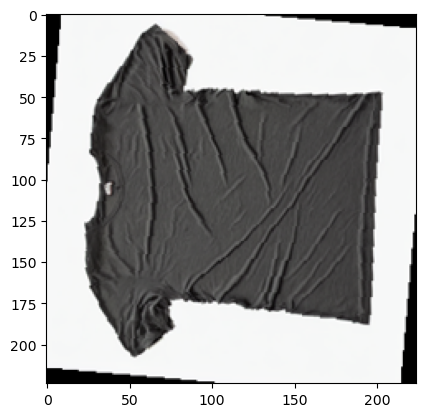

In [20]:
from fastai.vision.all import load_learner

# Load the trained model
path = './vit.pkl'
learn = load_learner(path)

# Load an image
img_path = 'tshirt_20230920154938.png'
img = Image.open(img_path)
img = img.rotate(-275)
# If you used any specific item transforms during training, apply them here
img = img.resize((224, 224))  # Example resize, adjust according to your training setup

plt.imshow(img)

# Make a prediction
pred, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred}")
print(f"Prediction Index: {pred_idx}")
